In [1]:
# Single cell instances for contact sheet

In [2]:
!pwd
!date

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_notebooks/MovieMitosis
Tue Jun 28 02:03:51 PDT 2022


In [3]:
import os
import sys
import pickle
import importlib
import concurrent
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm
from skimage import io as skio
import matplotlib.pyplot as plt
from aicscytoparam import cytoparam
from aicsshparam import shtools, shparam
from aicsimageio import AICSImage
from aicsimageio.writers import OmeTiffWriter
from cvapipe_analysis.tools import io, viz, general, controller, shapespace, plotting

sys.path.insert(1, '../tools')
import common

In [4]:
path_step = Path("/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_m3/shapemode")
control, device = common.get_managers_from_step_path(path_step)
print(control.get_staging())

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_m3


In [5]:
df = device.load_step_manifest("loaddata")
print(df.shape)

(981, 4)


### Load single cell data

In [6]:
selection = {"FBL": [702479,591418], 
"NPM1": [715832,718204], 
"SON": [488155,526387], 
"SMC1A": [995510,991109], 
"HIST1H2BJ": [720237,723824], 
"LMNB1": [291693,290906], 
"NUP153": [797779,818877], 
"SEC61B": [374984,383224], 
"ATP2A2": [792312,846933], 
"TOMM20": [322489,342166], 
"SLC25A17": [825160,803987], 
"RAB5A": [819639,933793], 
"LAMP1": [632595,628172], 
"ST6GAL1": [817818,418815], 
"CETN2": [426417,940506], 
"TUBA1B": [233419,250450], 
"AAVS1": [629413,612339], 
"ACTB": [437629,472817], 
"ACTN1": [525204,531803], 
"MYH10": [508915,582629], 
"GJA1": [486153,464229], 
"TJP1": [555913,544240], 
"DSP": [361366,368112], 
"CTNNB1": [945498,855928], 
"PXN": [592189,975228]}

In [7]:
%%time
data = common.load_multiple_single_cell_images(
    selection = selection,
    df = df,
    control = control
)

CPU times: user 17min 32s, sys: 13min 10s, total: 30min 43s
Wall time: 14min 20s


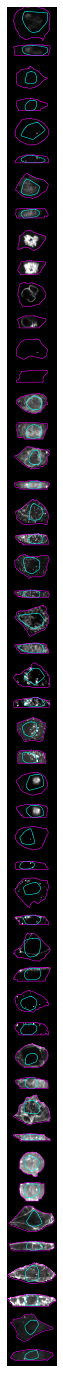

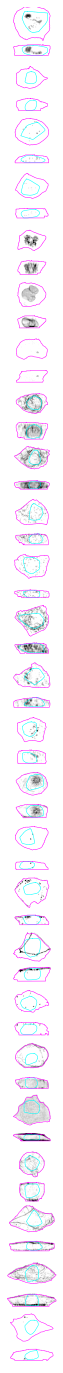

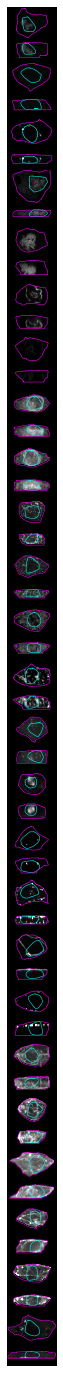

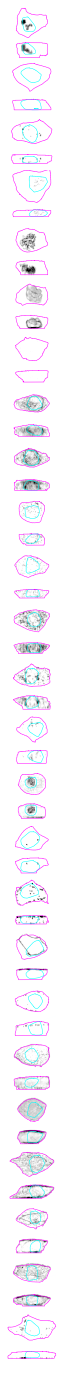

In [15]:
bbox = 400
importlib.reload(common)
common.make_contact_sheet_raw_and_seg_channels(
    data = data,
    bbox = bbox,
    file_prefix = "MovieMitoticsM2_gfp",
    special_raw_contrast={"TUBA1B": (1500, 8000)},
    nucleus_contour_off = ["LMNB1", "NUP153", "HIST1H2BJ"]
)

In [9]:
importlib.reload(common)

<module 'common' from '/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_notebooks/MovieMitosis/../tools/common.py'>

### Create domain (mean cell shape)

In [10]:
# nisos = control.get_number_of_interpolating_points()
# inner_alias = control.get_inner_most_alias_to_parameterize()
# outer_alias = control.get_outer_most_alias_to_parameterize()
# inner_mesh = device.read_vtk_polydata(f"avgshape/m2_{inner_alias}_matched.vtk")
# outer_mesh = device.read_vtk_polydata(f"avgshape/m2_{outer_alias}_matched.vtk")
# domain, origin = cytoparam.voxelize_meshes([outer_mesh, inner_mesh])
# coords_param, coeffs_centroid = cytoparam.parameterize_image_coordinates(
#     seg_mem=(domain>0).astype(np.uint8),
#     seg_nuc=(domain>1).astype(np.uint8),
#     lmax=control.get_lmax(), nisos=[nisos, nisos]
# )
# coeffs_mem, centroid_mem, coeffs_nuc, centroid_nuc = coeffs_centroid
# coords_param += np.array(centroid_nuc).reshape(3, 1, 1)-np.array(centroid_mem).reshape(3, 1, 1)

In [11]:
# domain_nuc = (255*(domain>1)).astype(np.uint8)
# domain_mem = (255*(domain>0)).astype(np.uint8)

### Load avg representations

In [12]:
# path_step = Path("/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_m3/shapemode")
# control, device = common.get_managers_from_step_path(path_step)

In [13]:
# for iid in range(len(selection["FBL"])):
#     morphs = {}
#     for gene in data.keys():
#         instance = data[gene][iid]
#         rep = device.read_parameterized_intensity(instance["CellId"])
#         morphed = cytoparam.morph_representation_on_shape(
#             img=domain,
#             param_img_coords=coords_param,
#             representation=rep
#         )
#         morphed = np.stack([domain_nuc, domain_mem, morphed, morphed], axis=0)
#         morphs[gene] = [{"CelllId": instance["CellId"], "img": morphed}]
        
#     bbox = 400

#     common.make_contact_sheet_raw_and_seg_channels(
#         data = morphs,
#         bbox = bbox,
#         file_prefix = f"Movie_m2_gfp_morphed_{iid}",
#         nucleus_contour_off = ["LMNB1", "NUP153",  "HIST1H2BJ"]
#     )

In [14]:
common.now("complete")

complete 2022-06-28 02:19:41
